In [21]:
import sys
!{sys.executable} -m pip install keras
!{sys.executable} -m pip install tensorflow
!{sys.executable} -m pip install nbconvert
!{sys.executable} -m pip install colorspacious
!{sys.executable} -m pip install scikit-learn
!{sys.executable} -m pip install opencv-python

In [51]:
import os
from pathlib import Path
from keras.preprocessing import image
import matplotlib.pyplot as plt
from PIL import Image

from colorspacious import cspace_converter
from matplotlib import colormaps
import matplotlib as mpl
import matplotlib.image as mpimg

from sklearn.cluster import KMeans

import numpy as np

In [23]:
p = Path("./Dataset/train_another")
dirs = p.glob("*")

image_data = []
labels = []
label_dict = {"damage":0,"no_damage":1}
bin_to_label = {0:"damage",1:"no_damage"}

for folder_dir in dirs:
    label = str(folder_dir).split("\\")[-1]
    print(label)
    cnt = 0
    print(folder_dir)

    for img_path in folder_dir.glob("*.jpeg"):
        img = image.load_img(img_path,target_size=(128,128))
        img_array = image.img_to_array(img)
        image_data.append(img_array)
        labels.append(label_dict[label])
        cnt +=1
    
    print(cnt)

damage
Dataset\train_another\damage
5000
no_damage
Dataset\train_another\no_damage
5000


In [24]:
print(len(image_data))
print(len(labels))

10000
10000


In [25]:
x = np.array(image_data)
y = np.array(labels)

print(x.shape)
print(y.shape)

(10000, 128, 128, 3)
(10000,)


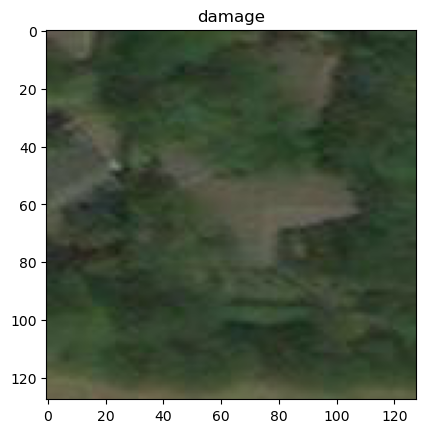

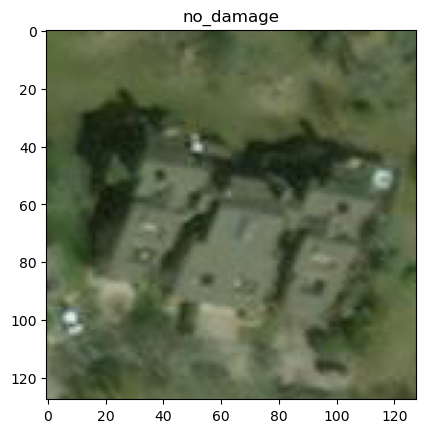

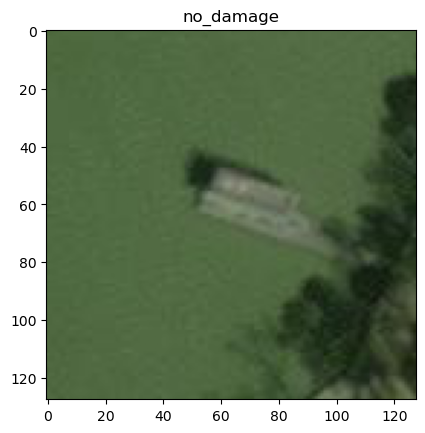

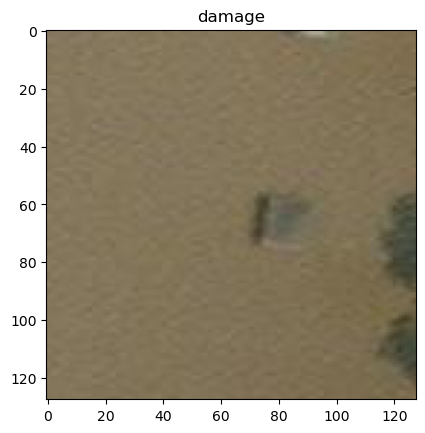

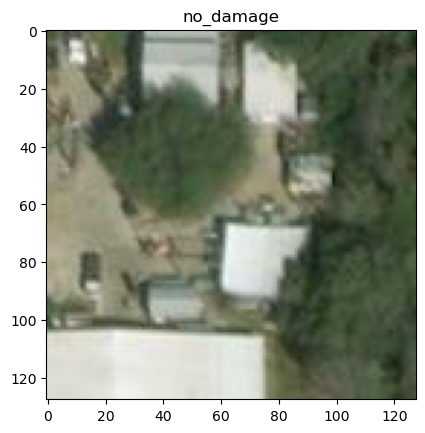

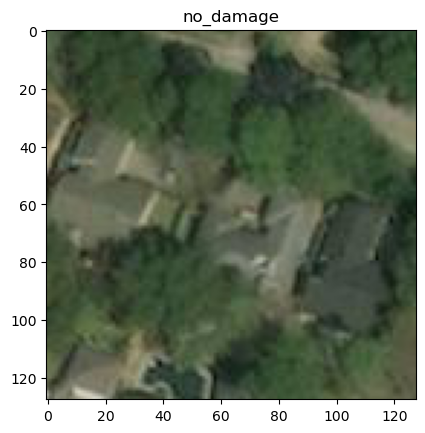

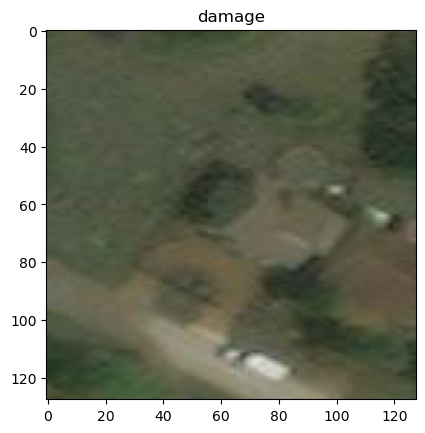

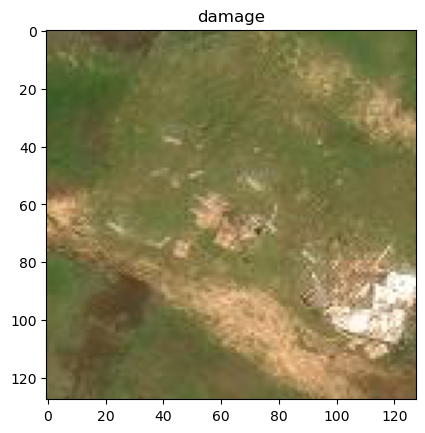

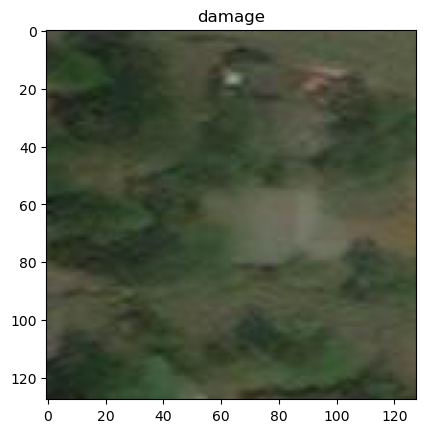

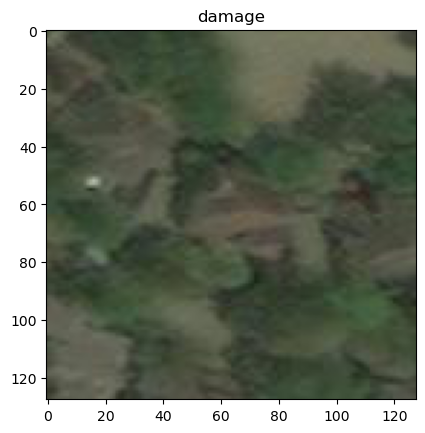

In [33]:
def drawImg(img, label):
    plt.title(bin_to_label[label])
    plt.imshow(img)
    plt.show()

#def drawImgBW(img,label):
#   gray_img = rgb2gray(img)
#   plt.title(bin_to_label[label])
#   plt.imshow(gray_img, cmap='terrain')
#    plt.show()

#drawImg(x[1]/255.0,y[1])
#drawImgBW(x[1]/255.0,y[1])
#drawImg(x[3500]/255.0,y[3500])
#drawImgBW(x[3500]/255.0,y[3500])
#drawImg(x[4800]/255.0,y[4800])
#drawImgBW(x[4800]/255.0,y[4800])

#drawImg(x[5100]/255.0,y[5100])
#drawImgBW(x[5100]/255.0,y[5100])
#drawImg(x[8000]/255.0,y[8000])
#drawImgBW(x[8000]/255.0,y[8000])
#drawImg(x[9400]/255.0,y[9400])
#drawImgBW(x[9400]/255.0,y[9400])


for i in range(10):
   r = np.random.randint(10000)
   drawImg(x[r]/255.0,y[r])
   # drawImgBW(x[r]/255.0,y[r])
    

In [61]:
n_samples, height, width, channels = x.shape
img_reshape = x.reshape(-1, channels)

In [67]:
kmeans = KMeans(n_clusters=2)

In [69]:
kmeans.fit(img_reshape)

KMeans(n_clusters=2)

In [75]:
segmented_labels = kmeans.labels_
segmented_img = kmeans.cluster_centers_[segmented_labels]

In [77]:
segmented_img = segmented_img.reshape(x.shape)

In [79]:
segmented_img = segmented_img.astype(np.uint8)

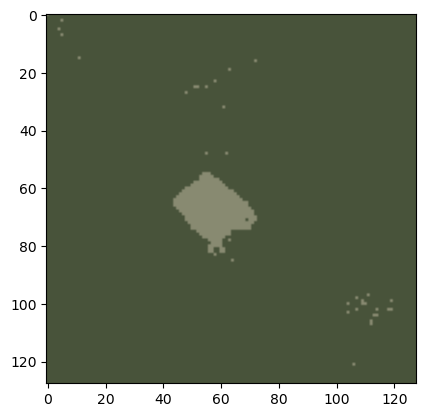

In [89]:
display_index = 0
display_image = segmented_img[display_index]

plt.imshow(display_image)
plt.show()